Sales Data Analysis 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\ADNAN\\Downloads\\SalesData.csv")
#df.head()
#df.shape
#df.describe(include='object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   int64  
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1952 non-null   int64  
 14  Country               1952 non-null   object 
 15  Region               

In [12]:
# Remove RowID column from the dataset
df.drop("Row ID", axis=1, inplace=True)
df.columns

Index(['Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [15]:
# Dividing dataset based on similar data content
customer_columns = ['Customer ID', 'Customer Name', 'Customer Segment']
product_columns = ['Product Category', 'Product Sub-Category', 'Product Container', 
                   'Product Name', 'Product Base Margin']
order_columns = ['Row ID', 'Order Priority', 'Order Date', 'Ship Date', 'Ship Mode', 
                 'Region', 'Country', 'State or Province', 'City', 'Postal Code', 'Order ID']
sales_columns = ['Discount', 'Unit Price', 'Shipping Cost', 'Profit', 
                 'Quantity ordered new', 'Sales']

df_customer = df[customer_columns]
df_product = df[product_columns]
df_order = df[order_columns]
df_sales = df[sales_columns]

print("Customer: ", df_customer.shape)
print("Product: ", df_product.shape)
print("Order: ", df_order.shape)
print("Sales: ", df_sales.shape)

Customer:  (1952, 3)
Product:  (1952, 5)
Order:  (1952, 11)
Sales:  (1952, 6)


In [18]:
## EDA on Customer data

# Unique Customer count
unique_customers = df_customer['Customer ID'].nunique()
print(f"Unique Customers: {unique_customers}")

# Customer Segment
segment_distribution = df_customer['Customer Segment'].value_counts()
print("\n", segment_distribution)

# Most frequent Customer
frequent_customer = df_customer['Customer Name'].value_counts().idxmax()
print("\n", f"Most Frequent Customer: {frequent_customer}")

Unique Customers: 1130

 Customer Segment
Corporate         684
Home Office       470
Consumer          410
Small Business    388
Name: count, dtype: int64

 Most Frequent Customer: Jenny Gold


Product Category
Office Supplies    1071
Technology          481
Furniture           400
Name: count, dtype: int64

 Top Selling Product Sub-Category
Paper                             284
Binders and Binder Accessories    200
Telephones and Communication      194
Office Furnishings                185
Computer Peripherals              174
Name: count, dtype: int64


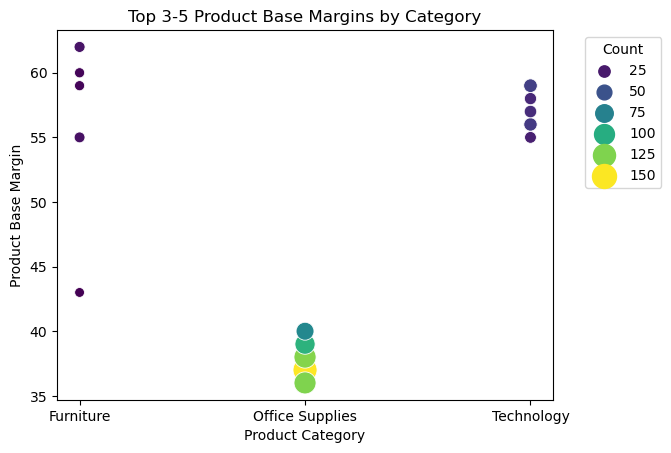

In [34]:
## EDA on Product data

# Product Categories count
category_count = df_product['Product Category'].value_counts()
print(category_count)

# Top-selling Sub-Categories
sub_category_distribution = df_product['Product Sub-Category'].value_counts().head(5)
print("\n Top Selling", sub_category_distribution)

# Visualise Product Base Margin wrt Product Category
import seaborn as sns
import matplotlib.pyplot as plt

base_margin_count = df_product.groupby('Product Category')['Product Base Margin'].value_counts()
base_margin_count_df = base_margin_count.reset_index(name='Count')
#print(base_margin_count)

top_base_margins = base_margin_count_df.groupby('Product Category').head(5)

# Plot the data
sns.scatterplot(
    data=top_base_margins,
    x='Product Category',
    y='Product Base Margin',
    size='Count',
    hue='Count',
    palette='viridis',
    sizes=(50, 300)  # Control dot sizes
)
plt.title("Top 3-5 Product Base Margins by Category")
plt.xlabel("Product Category")
plt.ylabel("Product Base Margin")
plt.legend(title='Count', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

Order Priority
Low              398
Not Specified    396
High             391
Critical         391
Medium           376
Name: count, dtype: int64


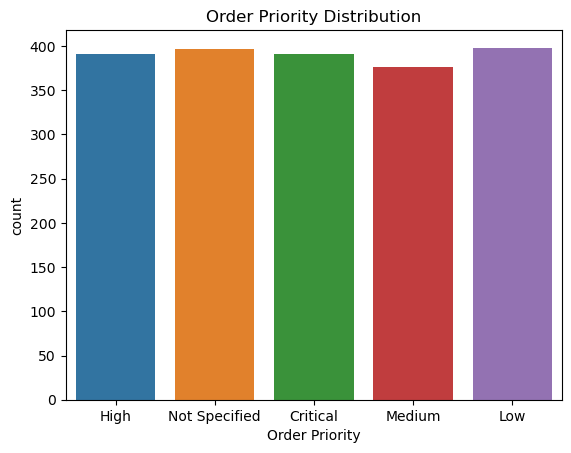

Orders by Region:
Region
Central    566
East       474
West       470
South      442
Name: count, dtype: int64


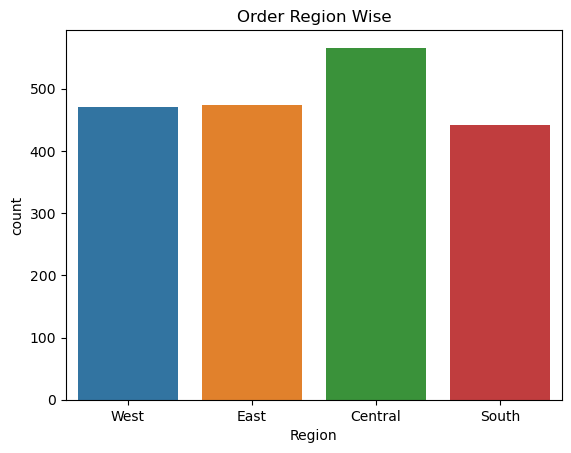

In [76]:
## EDA on Order data

# Visualise Order Priority 

df_order.loc[532, 'Order Priority'] = df_order.loc[532, 'Order Priority'].replace('Critical ', 'Critical')
#print(df_order.loc[532, 'Order Priority'])

order_priority_distribution = df_order['Order Priority'].value_counts()
print(order_priority_distribution)
sns.countplot(data=df_order, x = 'Order Priority')
plt.title("Order Priority Distribution")
plt.show()

# Visualise Orders region wise

region_orders = df_order['Region'].value_counts()
print("Orders by Region:")
print(region_orders)
sns.countplot(data=df_order, x = 'Region')
plt.title("Order Region Wise")
plt.show()



Top Sales by Quantity:
Quantity ordered new
22    98983.45
12    91503.01
8     85757.20
14    84243.30
11    82102.89
Name: Sales, dtype: float64


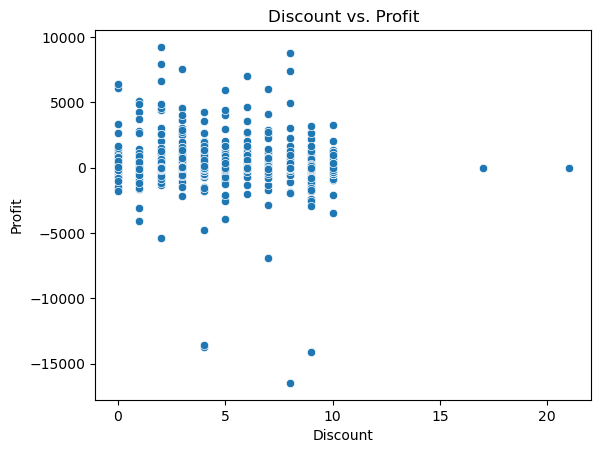

In [86]:
## EDA for Sales data

# Sales vs Product Category


#df_merged = df_product.merge(df_sales[['Product Category', 'Sales']], on='Product Category', how='inner')



#sns.barplot(data=df_merged, x='Product Category', y='Sales')
#plt.title("Product Category Sales")
#plt.xticks(rotation=90) 
#plt.show()

top_sales = df_sales.groupby('Quantity ordered new')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top Sales by Quantity:")
print(top_sales)

sns.scatterplot(data=df_sales, x='Discount', y='Profit')
plt.title("Discount vs. Profit")
plt.show()